Import of libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio

import datetime
from datetime import timedelta

import pyet
from scipy.interpolate import make_interp_spline, BSpline

In [26]:
df = pd.read_csv('Lampa_minute.csv',sep=';', index_col= 'TIMESTAMP')
df.index = pd.to_datetime(df.index)
df

,Lam_Bel_Pyr0,Lam_Ref_Pyr27,Lam_Bel_Air_V,Lam_Bel_Air_T,Lam_Bel_Air_Patm,Lam_Bel_RH,Lam_Bel_Wind_Spd,Lam_Bel_Soil_T,Lam_Bel_Soil_H,Lam_Ref_Air_V,Lam_Ref_Air_T,Lam_Ref_Pyr0,Lam_Ref_Air_Patm,Lam_Ref_RH,Lam_Ref_Wind_Spd,Lam_Ref_Soil_T,Lam_Ref_Soil_H
TIMESTAMP,,,,,,,,,,,,,,,,,
2021-10-16 00:00:00,0.008,-0.013,0.738,10.3,97.0,59.0,0.074,19.650,27.9000,0.767,10.4,0.001,96.1,60.6,0.074,21.3,23.243333
2021-10-16 00:01:00,-0.004,-0.001,0.737,10.3,97.0,59.0,0.074,19.650,27.8900,0.761,10.4,-0.024,96.1,60.3,0.074,21.3,23.236667
2021-10-16 00:02:00,0.004,0.000,0.735,10.2,97.0,58.9,0.074,19.625,27.8900,0.752,10.4,0.003,96.1,59.6,0.074,21.3,23.240000
2021-10-16 00:03:00,0.013,0.006,0.718,10.2,97.0,57.8,0.074,19.625,27.8875,0.728,10.4,-0.001,96.1,57.9,0.074,21.3,23.240000
2021-10-16 00:04:00,0.009,0.012,0.715,10.1,97.0,57.8,0.101,19.625,27.8875,0.727,10.3,0.002,96.1,58.1,0.101,21.3,23.240000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 23:55:00,0.001,0.014,1.404,19.4,96.5,62.5,1.233,NaN,NaN,1.451,19.3,0.013,95.6,65.0,0.796,NaN,NaN
2023-03-13 23:56:00,0.013,-0.004,1.407,19.4,96.5,62.6,0.934,NaN,NaN,1.449,19.3,0.002,95.6,64.9,0.996,NaN,NaN
2023-03-13 23:57:00,0.003,-0.009,1.405,19.4,96.5,62.5,0.780,NaN,NaN,1.447,19.3,0.004,95.6,64.8,1.024,NaN,NaN


In [28]:
# resample to hourly values
df = df.resample("H").mean() 
print("The dataframe contains " + str(df.isnull().sum().sum())+ " NaN values")
#df = df.loc["2021-10-16 00:00:00":"2022-10-15 23:59:00"]
#df.to_csv("APV_Lampa_Microclimate.csv", sep=";")
df = df.fillna(method="ffill")
df

The dataframe contains 0 NaN values


,Lam_Bel_Pyr0,Lam_Ref_Pyr27,Lam_Bel_Air_V,Lam_Bel_Air_T,Lam_Bel_Air_Patm,Lam_Bel_RH,Lam_Bel_Wind_Spd,Lam_Bel_Soil_T,Lam_Bel_Soil_H,Lam_Ref_Air_V,Lam_Ref_Air_T,Lam_Ref_Pyr0,Lam_Ref_Air_Patm,Lam_Ref_RH,Lam_Ref_Wind_Spd,Lam_Ref_Soil_T,Lam_Ref_Soil_H
TIMESTAMP,,,,,,,,,,,,,,,,,
2021-10-16 00:00:00,-0.000317,-0.001267,0.721217,9.345000,97.015000,61.413333,0.165867,19.459583,27.821208,0.744600,9.160000,-0.000367,96.100000,64.245000,0.165867,21.008333,23.145944
2021-10-16 01:00:00,-0.001750,-0.002550,0.673033,7.851667,97.041667,63.370000,0.134483,19.054167,27.667333,0.705350,7.638333,-0.000333,96.100000,67.383333,0.134483,20.368333,22.983111
2021-10-16 02:00:00,-0.001100,-0.001367,0.625983,6.211667,97.000000,65.971667,0.084500,18.640000,27.529625,0.652900,6.038333,-0.001150,96.083333,69.635000,0.084500,19.763333,22.832667
2021-10-16 03:00:00,-0.000583,-0.000983,0.589350,5.223333,97.000000,66.505000,0.102950,18.240417,27.398000,0.616133,5.063333,-0.001233,96.000000,70.300000,0.102950,19.167222,22.680167
2021-10-16 04:00:00,-0.003883,-0.004033,0.555517,4.146667,97.000000,67.581667,0.063800,17.837500,27.275333,0.572300,3.860000,-0.001833,96.000000,71.050000,0.063800,18.581111,22.528111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13 19:00:00,38.981400,91.524383,1.639533,27.003333,96.400000,46.043333,0.447250,32.371023,16.099148,1.623217,26.425000,18.513850,95.500000,47.145000,0.577483,31.636111,11.034907
2023-03-13 20:00:00,0.852517,1.421917,1.566167,24.540000,96.418333,50.860000,0.855000,32.371023,16.099148,1.580200,24.155000,0.812567,95.500000,52.515000,0.905133,31.636111,11.034907
2023-03-13 21:00:00,0.001217,0.000883,1.494780,22.140678,96.500000,56.081356,0.820967,32.371023,16.099148,1.526458,21.918644,-0.003650,95.588136,58.042373,0.644283,31.636111,11.034907


In [29]:
# resample to daily values
# Resample and define Reference input meteorological variables
tmax = df['Lam_Ref_Air_T'].resample("D").max()
tmin = df['Lam_Ref_Air_T'].resample("D").min()
tmean = (tmax + tmin ) /2
rhmax = df['Lam_Ref_RH'].resample("D").max()
rhmin = df['Lam_Ref_RH'].resample("D").min()
rh = df['Lam_Ref_RH'].resample("D").mean()
wind = df['Lam_Ref_Wind_Spd'].resample("D").mean()
rs = df['Lam_Ref_Pyr0'].resample("D").sum() * 0.0036

# save results in new dataframe
df_d = pd.DataFrame()
df_d["rs_MJ_m2"] = rs
df_d["tmean_C"] = tmean
df_d["tmax_C"] = tmax
df_d["tmin_C"] = tmin
df_d["rh_%"] = rh
df_d["rhmax_%"] = rhmax
df_d["rhmin_%"] = rhmin
df_d["wind_speed_m_s"] = wind

# Resample and define Below input meteorological variables
tmax_bel = df['Lam_Bel_Air_T'].resample("D").max()
tmin_bel = df['Lam_Bel_Air_T'].resample("D").min()
tmean_bel = (tmax_bel + tmin_bel ) /2
rhmax_bel = df['Lam_Bel_RH'].resample("D").max()
rhmin_bel = df['Lam_Bel_RH'].resample("D").min()
rh_bel = df['Lam_Bel_RH'].resample("D").mean()
wind_bel = df['Lam_Bel_Wind_Spd'].resample("D").mean()
rs_bel = df['Lam_Bel_Pyr0'].resample("D").sum() * 0.0036

df_db = pd.DataFrame()
df_db["rs_MJ_m2"] = rs_bel
df_db["tmean_C"] = tmean_bel
df_db["tmax_C"] = tmax_bel
df_db["tmin_C"] = tmin_bel
df_db["rh_%"] = rh_bel
df_db["rhmax_%"] = rhmax_bel
df_db["rhmin_%"] = rhmin_bel
df_db["wind_speed_m_s"] = wind_bel

In [30]:
# Visualization of Data
variable = "rs_MJ_m2"

# Summary
print("La diferencia entre Below y Referencia es de "+str(-round(100-(100/df_d[variable].sum()*df_db[variable].sum()),1))+" % en promedio")
# Plot  values
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_db.index, y=df_db[variable], name="Bel",
                         ))
fig.add_trace(go.Scatter(x=df_d.index, y=df_d[variable], name="Ref",
                         ))
fig.add_trace(go.Scatter(x=df_db.index, y=df_db[variable]-df_d[variable], name="Diff = Bel - Ref",
                         ))
# Edit the layout
fig.update_layout(title='Datos APV Lampa', yaxis_title=variable) # 
fig.show()

La diferencia entre Below y Referencia es de -29.3 % en promedio


In [31]:
df_d["shade"] = 100 - (100/df_d["rs_MJ_m2"] * df_db["rs_MJ_m2"])
print("Minimum daily shading rate is: "+str(round(df_d["shade"].min(),1))+ "%")
print("Maximum daily shading rate is: "+str(round(df_d["shade"].max(),1))+ "%")

Minimum daily shading rate is: -66.7%
Maximum daily shading rate is: 55.2%


---- BACKUP -----

ISSUES:
- Pyr0 reference data seems strange after october 2022 (maybe influence of a tree)

hence shading underneath the AV pilot is 29.34%


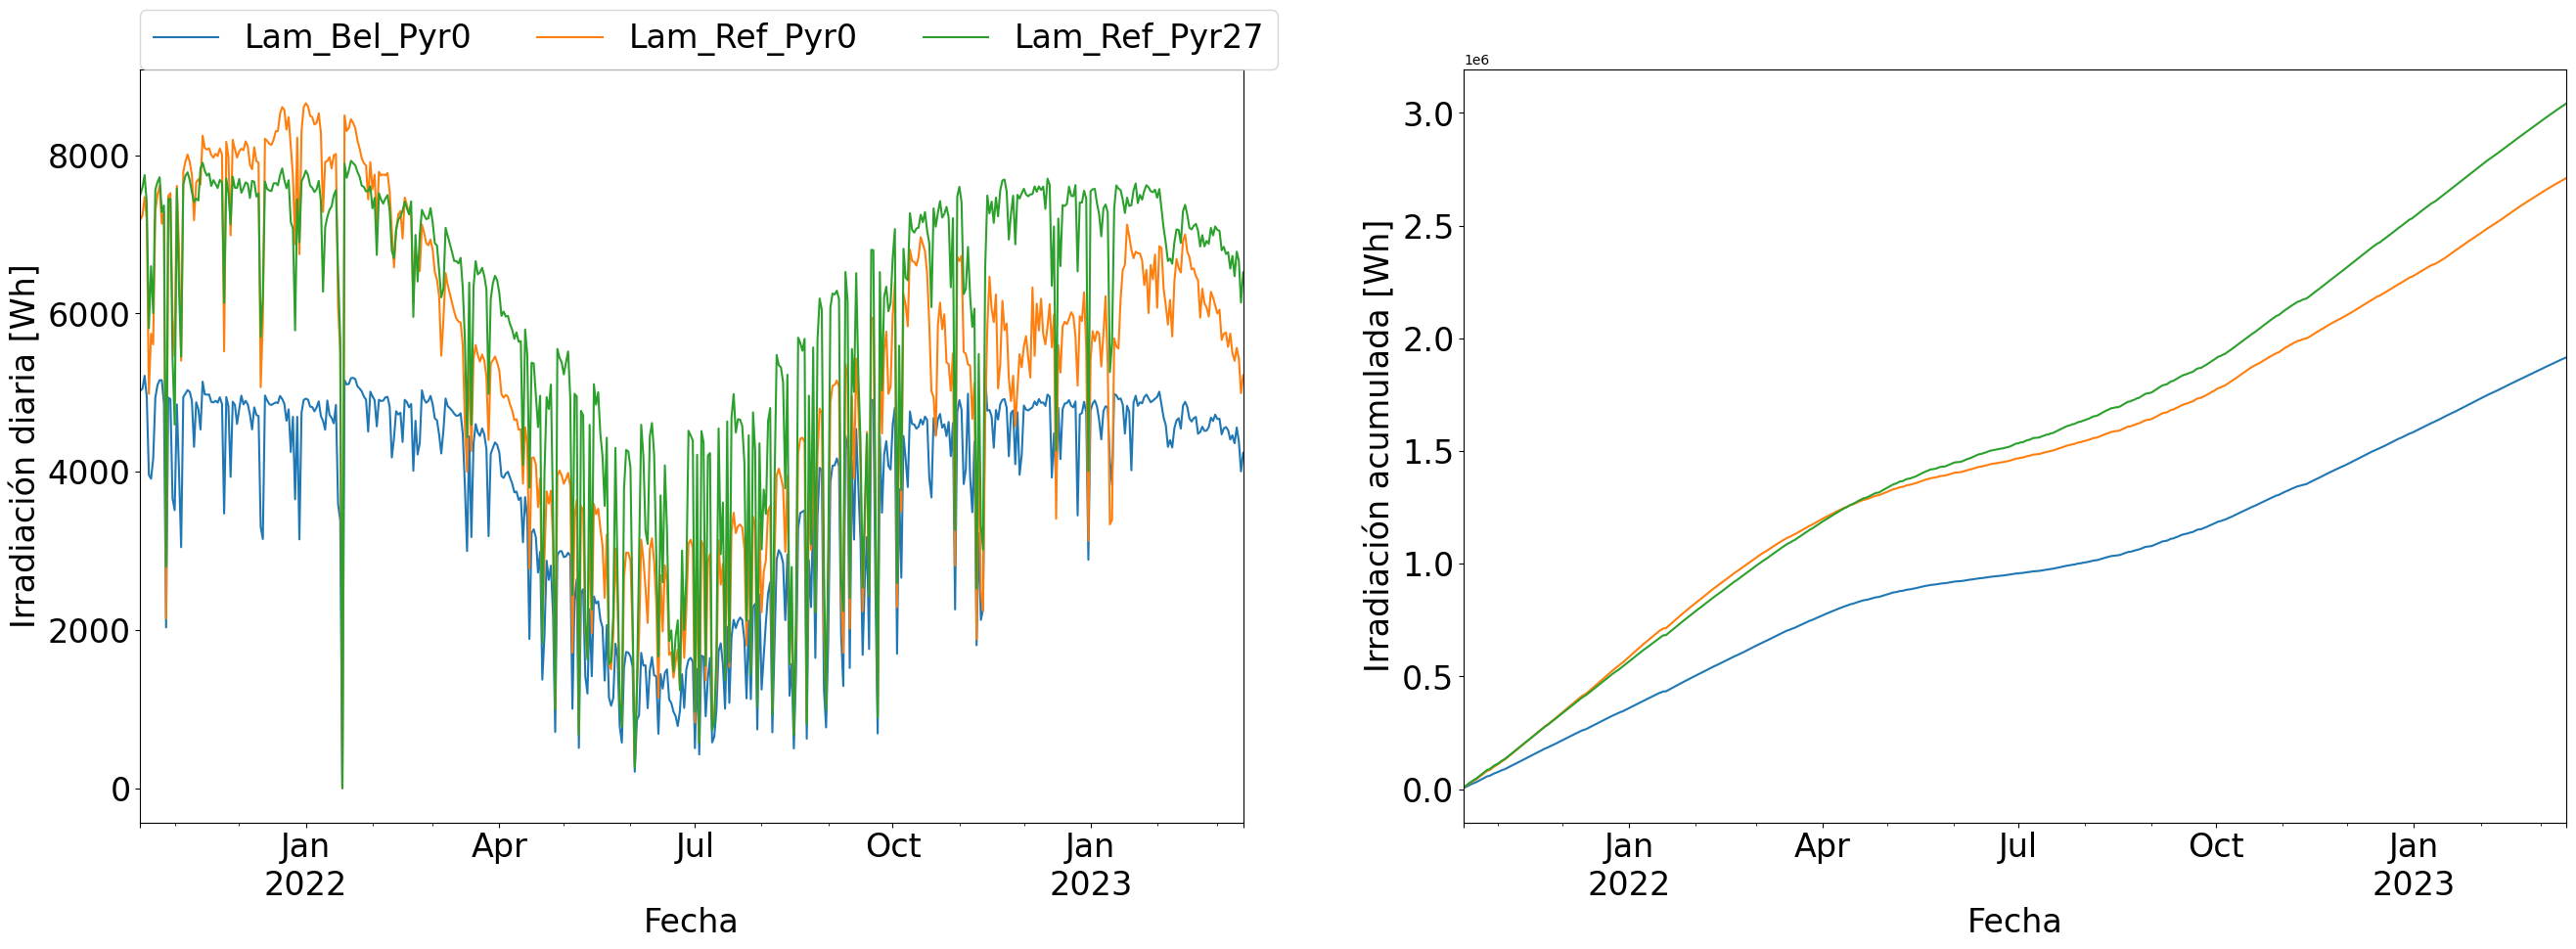

In [32]:
#print("The total measured irradiation underneath the AV pilot equals "+str(round(100/df["Lam_Ref_Pyr0"].sum()*df["Lam_Bel_Pyr0"].sum(),2))+"% of the total measured irradiation in the reference Zone")

# Graph result for irradiacion
#df_irr = df[["Lam_Bel_Pyr0", "Lam_Ref_Pyr0"]].resample("D").sum() 
#df_irr = df_irr.rename(columns={"Lam_Bel_Pyr0": 'Agro PV',"Lam_Ref_Pyr0": 'Reference'})
df_irr = df[["Lam_Bel_Pyr0", "Lam_Ref_Pyr0", "Lam_Ref_Pyr27"]].resample("D").sum()  # , 
fig, axs = plt.subplots(figsize=(32,10), ncols=2)
df_irr.plot(ax=axs[0], fontsize=24)
df_irr.cumsum().plot(ax=axs[1], legend=False, fontsize=24)

axs[0].set_ylabel("Irradiación diaria [Wh]", fontsize=24)
axs[1].set_ylabel("Irradiación acumulada [Wh]", fontsize=24)
axs[0].legend(ncol=6, loc=[0,1.], fontsize=24)
for i in (0,1):
    axs[i].set_xlabel("Fecha", fontsize=24)

print("hence shading underneath the AV pilot is "+str(round(100-(100/df["Lam_Ref_Pyr0"].sum()*df["Lam_Bel_Pyr0"].sum()),2))+"%")

<AxesSubplot: xlabel='TIMESTAMP'>

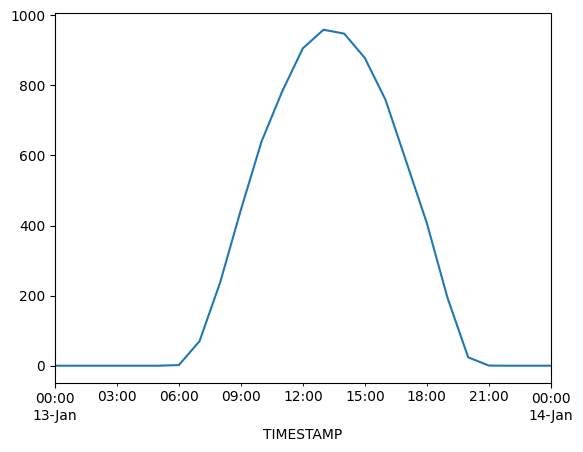

In [33]:
# good data for reference measurement
df.loc["2022-01-13 00:00:00":"2022-01-14 00:00:00"]["Lam_Ref_Pyr0"].plot()

<AxesSubplot: xlabel='TIMESTAMP'>

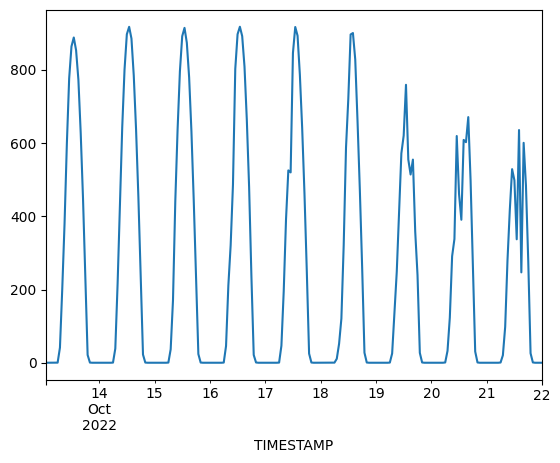

In [34]:
# Plot for the moment when plants began to cover Ref_Pyr0
df.loc["2022-10-13 00:03:00":"2022-10-22 00:03:00"]["Lam_Ref_Pyr0"].plot()

<AxesSubplot: xlabel='TIMESTAMP'>

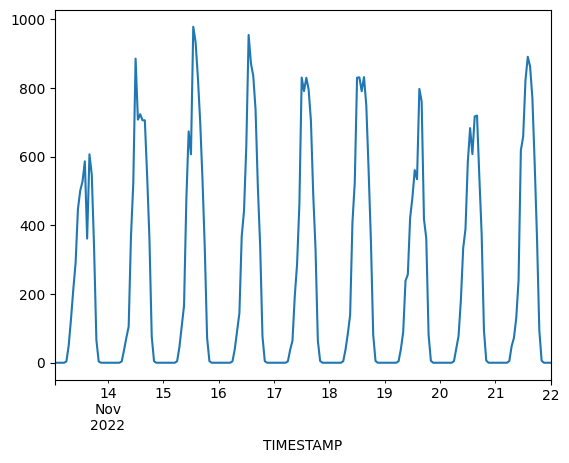

In [35]:
# bad data
df.loc["2022-11-13 00:03:00":"2022-11-22 00:03:00"]["Lam_Ref_Pyr0"].plot()

<AxesSubplot: xlabel='TIMESTAMP'>

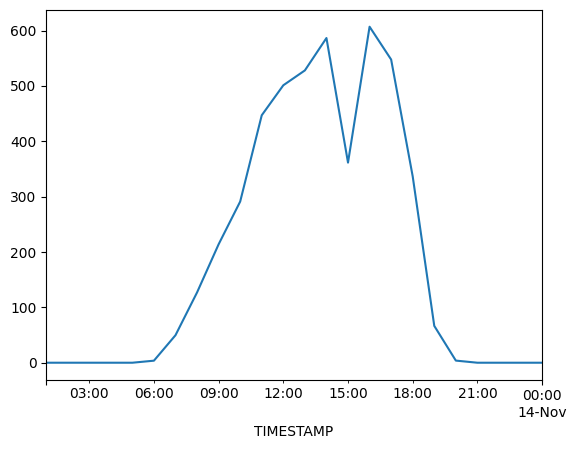

In [36]:
df.loc["2022-11-13 00:03:00":"2022-11-14 00:03:00"]["Lam_Ref_Pyr0"].plot()